# Demonstration of Photo Tools

In [1]:
import sys
import os
print(f"Python version: {sys.version}")
print(f"Working directory: {os.getcwd()}")
print("-" * 50)

Python version: 3.12.0 (main, May 18 2025, 17:01:09) [Clang 16.0.0 (clang-1600.0.26.6)]
Working directory: /Users/davidcurrymaster/Documents/projects/data-tools/notebooks
--------------------------------------------------


In [2]:
import pandas as pd
import numpy as np

sys.path.append(os.path.abspath('..'))
import src.data_tools as data_tools
import src.photo_tools as photo_tools

%load_ext autoreload
%autoreload 2

# Load Data

In [3]:
# Create test images directory
import os
os.makedirs('../data/test_images', exist_ok=True)

# Load tabular data first
df = pd.read_csv('test_data.csv')
print(f"Loaded tabular data: {df.shape}")

# Generate test images correlated with target
image_df = photo_tools.generate_test_images('../data/test_images', n_images=50, metadata_df=df.head(50))
print(f"Generated {len(image_df)} test images")

# Merge with original data
df_with_images = df.head(50).merge(image_df[['image_id', 'path', 'pattern', 'width', 'height']], 
                                   left_index=True, right_on='image_id')
print(f"Merged data shape: {df_with_images.shape}")

Loaded tabular data: (500, 20)
Generated 50 test images
Merged data shape: (50, 25)


In [4]:
df_with_images.head()

age  annual_income  credit_score  transaction_amount  product_views gender  \
0   28   83727.997743     49.444448          587.185346        0.00000      M   
1   37   22890.711694     41.253838          197.826427        0.00000      M   
2   45   37105.061624     41.113036          604.414719        0.00000  Other   
3   33   55483.632278     46.269633           21.721193       41.48655      F   
4   57   27243.393419     48.753416           43.158406        0.00000      M   

  state customer_id membership_level account_created  ...   feature_a  \
0    NY  CUST000383              NaN      2024-05-04  ...   74.322722   
1    IL  CUST000039           Silver      2024-07-24  ...   90.736181   
2    NC  CUST000489             Gold      2022-09-05  ...  123.352362   
3    IL  CUST000042             Gold      2023-12-12  ...  112.858167   
4    MI  CUST000387             Gold      2021-08-16  ...   96.576092   

    feature_b target  empty_column constant_column  image_id  \
0   62.352008      0           NaN  constant_value         0   
1   68.525237      0           NaN  constant_value         1   
2  117.991919      0           NaN  constant_value         2   
3   95.357249      0           NaN  constant_value         3   
4   46.700752      0           NaN  constant_value         4   

                                      path  pattern  width height  
0  ../data/test_images/test_image_0000.jpg    noise    256    224  
1  ../data/test_images/test_image_0001.jpg    noise    224    224  
2  ../data/test_images/test_image_0002.jpg    noise    224    256  
3  ../data/test_images/test_image_0003.jpg    noise    224    256  
4  ../data/test_images/test_image_0004.jpg    noise    512    256  

[5 rows x 25 columns]

In [5]:
image_df.columns

Index(['image_id', 'filename', 'path', 'width', 'height', 'target', 'pattern'], dtype='object')

# Quick Photo Overview

In [6]:
image_info = photo_tools.load_image_info('../data/test_images')
photo_tools.quick_image_summary(image_info)

IMAGE DATASET SUMMARY
Total images: 50
Image formats: {'JPEG': 50}
Color modes: {'RGB': 50}

Size statistics:
  Width: 224 - 512 (avg: 324)
  Height: 224 - 512 (avg: 289)
  File size: 5.2 - 209.0 KB
  Aspect ratios: 0.44 - 2.29


# Explore Images by a Target


target = 0 (n=44)


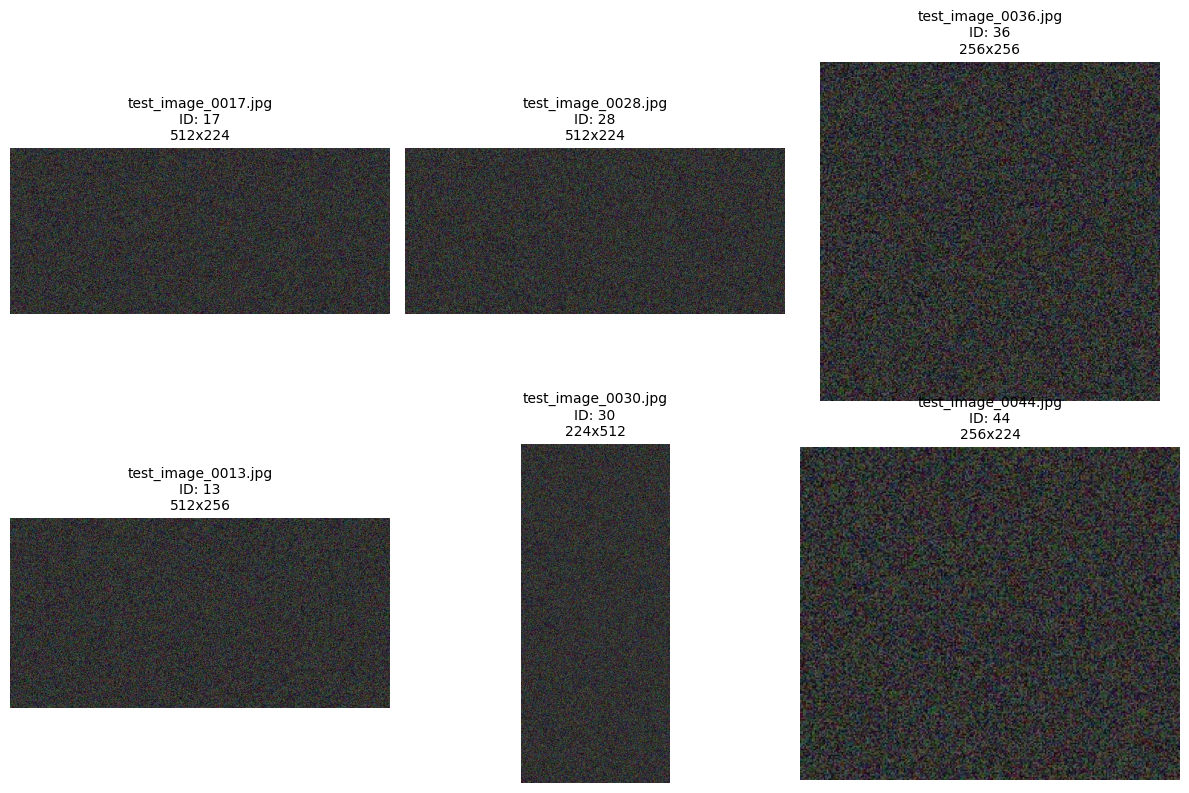


target = 1 (n=6)


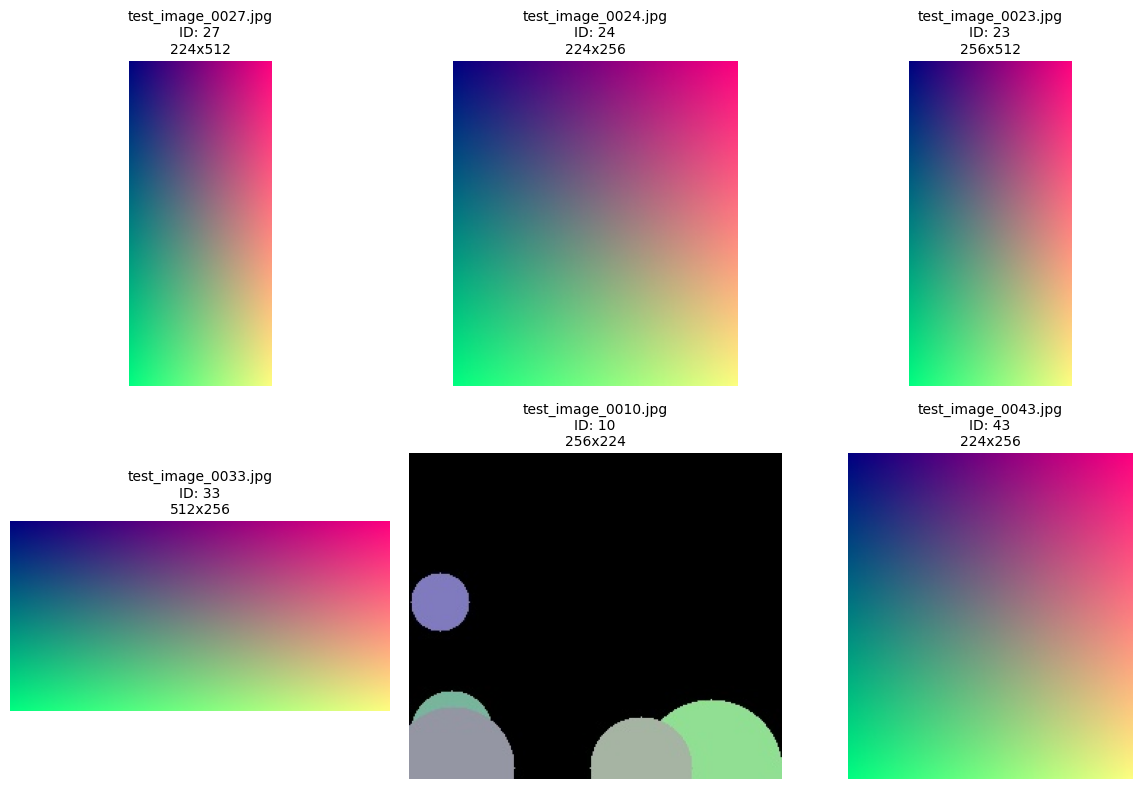

In [7]:
# Create explorer
explorer = photo_tools.ImageDataExplorer(df_with_images, image_col='path')

# Show sample images by target class
explorer.explore_by_target('target', n_samples=6)

# Interactive Image Browser

In [8]:
# Create interactive browser
browser = photo_tools.ImageBrowser(
    df_with_images, 
    image_col='path',
    metadata_cols=['customer_id', 'membership_level', 'annual_income', 'target', 'pattern']
)

# Display browser (click buttons to navigate)
browser.display()

# Analyze Image Properties

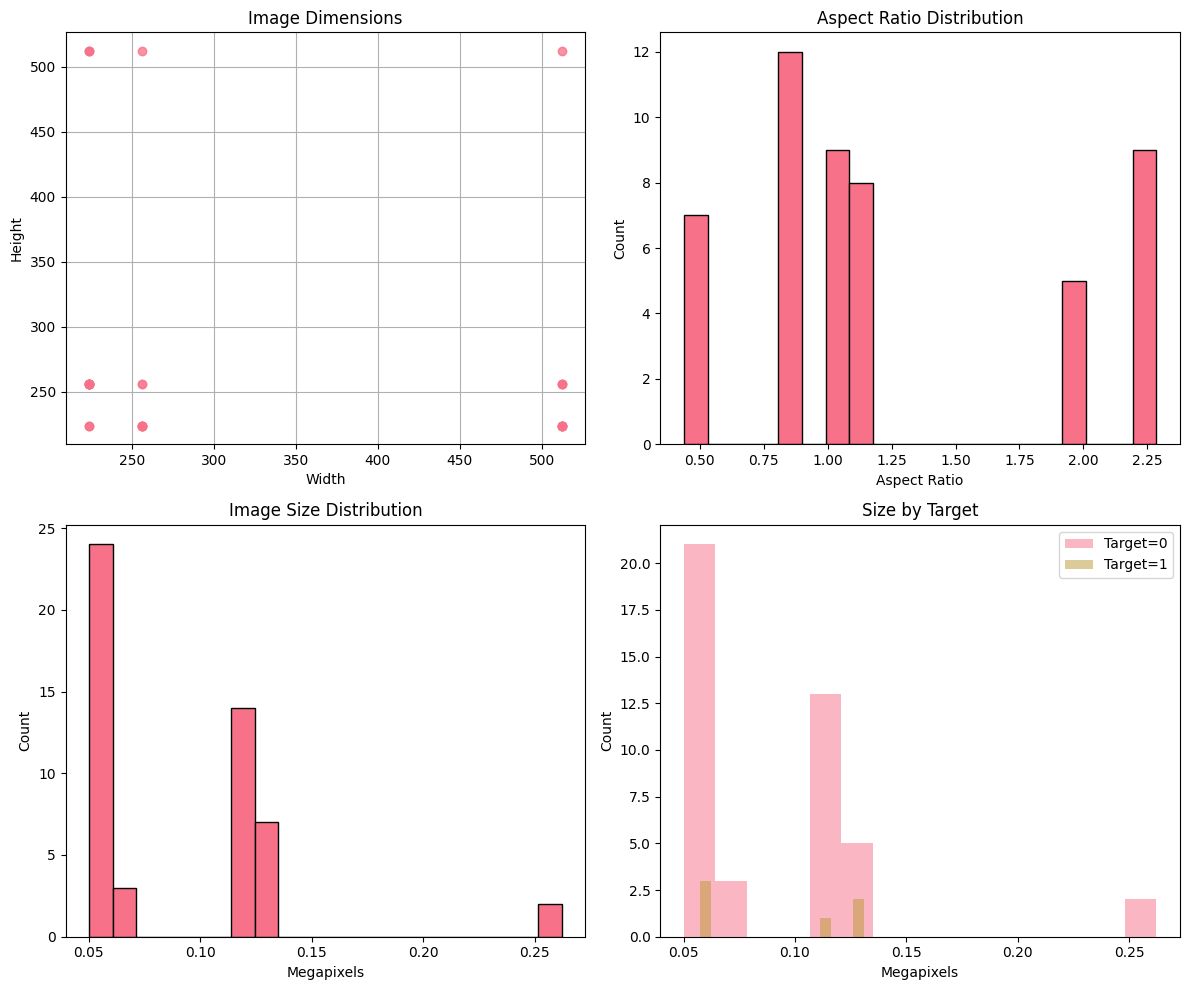

In [9]:
explorer.analyze_image_properties()

# Image Statistics for Preprocessing

In [19]:
# Analyze pixel statistics
stats = photo_tools.analyze_image_stats('../data/test_images', n_samples=30)

print("Image Statistics:")
print(f"Mean per channel (RGB): {stats['mean_per_channel']}")
print(f"Std per channel (RGB): {stats['std_per_channel']}")
print(f"Common dimensions: {stats['common_dimensions']}")
print(f"Dimension range: {stats['dimension_stats']}")

Image Statistics:
Mean per channel (RGB): [62.33982434 62.36066914 62.60366662]
Std per channel (RGB): [29.30029339 29.70280807 16.92932495]
Common dimensions: {'height': 224, 'width': 224}
Dimension range: {'min_height': np.int64(224), 'max_height': np.int64(512), 'min_width': np.int64(224), 'max_width': np.int64(512)}


# Preprocessing Pipeline Visualization


Image ID: 9
Target: 0
Original size: 256 × 224


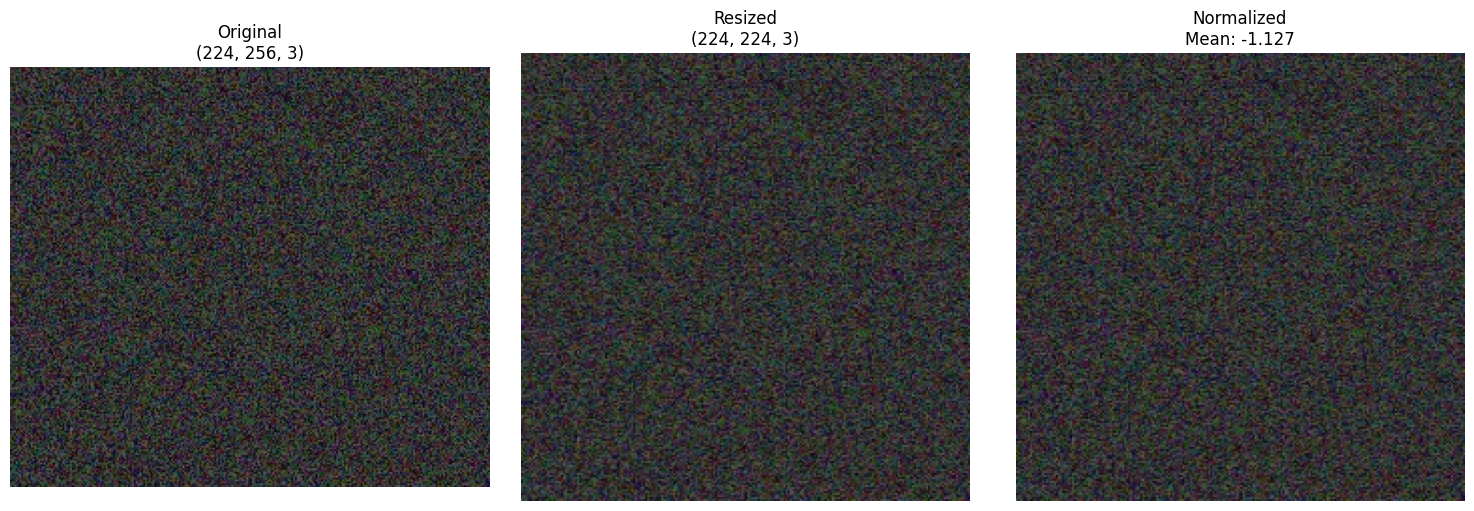


Image ID: 29
Target: 0
Original size: 512 × 256


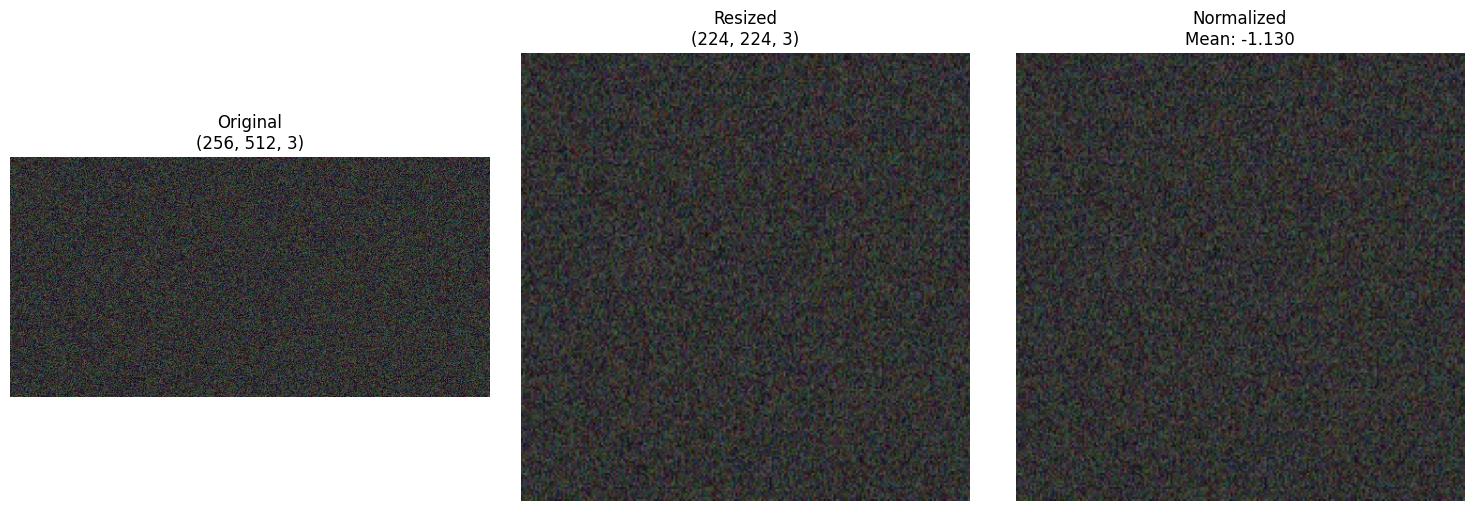


Image ID: 11
Target: 0
Original size: 224 × 256


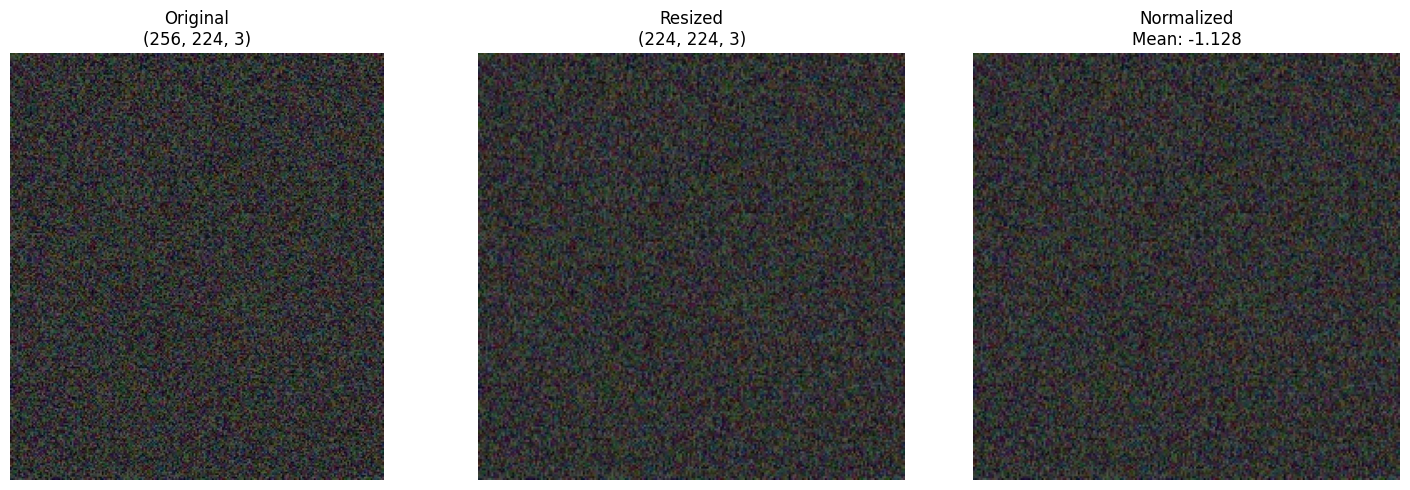

In [12]:
# Show preprocessing effects on sample images
explorer.create_preprocessing_report(sample_size=3)

# Combine Tabular and Image Analysis

In [14]:
# Analyze target rates by image properties
df_with_images['aspect_ratio'] = df_with_images['width'] / df_with_images['height']
df_with_images['megapixels'] = (df_with_images['width'] * df_with_images['height']) / 1_000_000

# Group by pattern type (for synthetic data)
data_tools.group_analyze(df_with_images, 'pattern', 'target')

# Create bins for aspect ratio
df_with_images = data_tools.create_quantile_bins(df_with_images, 'aspect_ratio', n_quantiles=5)
data_tools.group_analyze(df_with_images, 'aspect_ratio_quantile', 'target')


Analysis of target by pattern
Overall target rate: 12.00%
+-----------+---------+-------------+---------+----------------+--------------------+--------+------------+
| pattern   |   count |   positives | rate    | pct_of_total   | pct_of_positives   |   lift | lift_pct   |
+===========+=========+=============+=========+================+====================+========+============+
| noise     |      44 |           0 | 0.00%   | 88.00%         | 0.00%              |  0.000 | -100.0%    |
+-----------+---------+-------------+---------+----------------+--------------------+--------+------------+
| gradient  |       5 |           5 | 100.00% | 10.00%         | 83.33%             |  8.333 | +733.3%    |
+-----------+---------+-------------+---------+----------------+--------------------+--------+------------+
| circles   |       1 |           1 | 100.00% | 2.00%          | 16.67%             |  8.333 | +733.3%    |
+-----------+---------+-------------+---------+----------------+-------------

count  positives      rate  pct_of_total  \
aspect_ratio_quantile                                             
Q1                        19          4  0.210526          0.38   
Q2                         9          0  0.000000          0.18   
Q5                         9          0  0.000000          0.18   
Q3                         8          1  0.125000          0.16   
Q4                         5          1  0.200000          0.10   

                       pct_of_positives      lift    lift_pct  
aspect_ratio_quantile                                          
Q1                             0.666667  1.754386   75.438596  
Q2                             0.000000  0.000000 -100.000000  
Q5                             0.000000  0.000000 -100.000000  
Q3                             0.166667  1.041667    4.166667  
Q4                             0.166667  1.666667   66.666667

# Image Grid by Segment

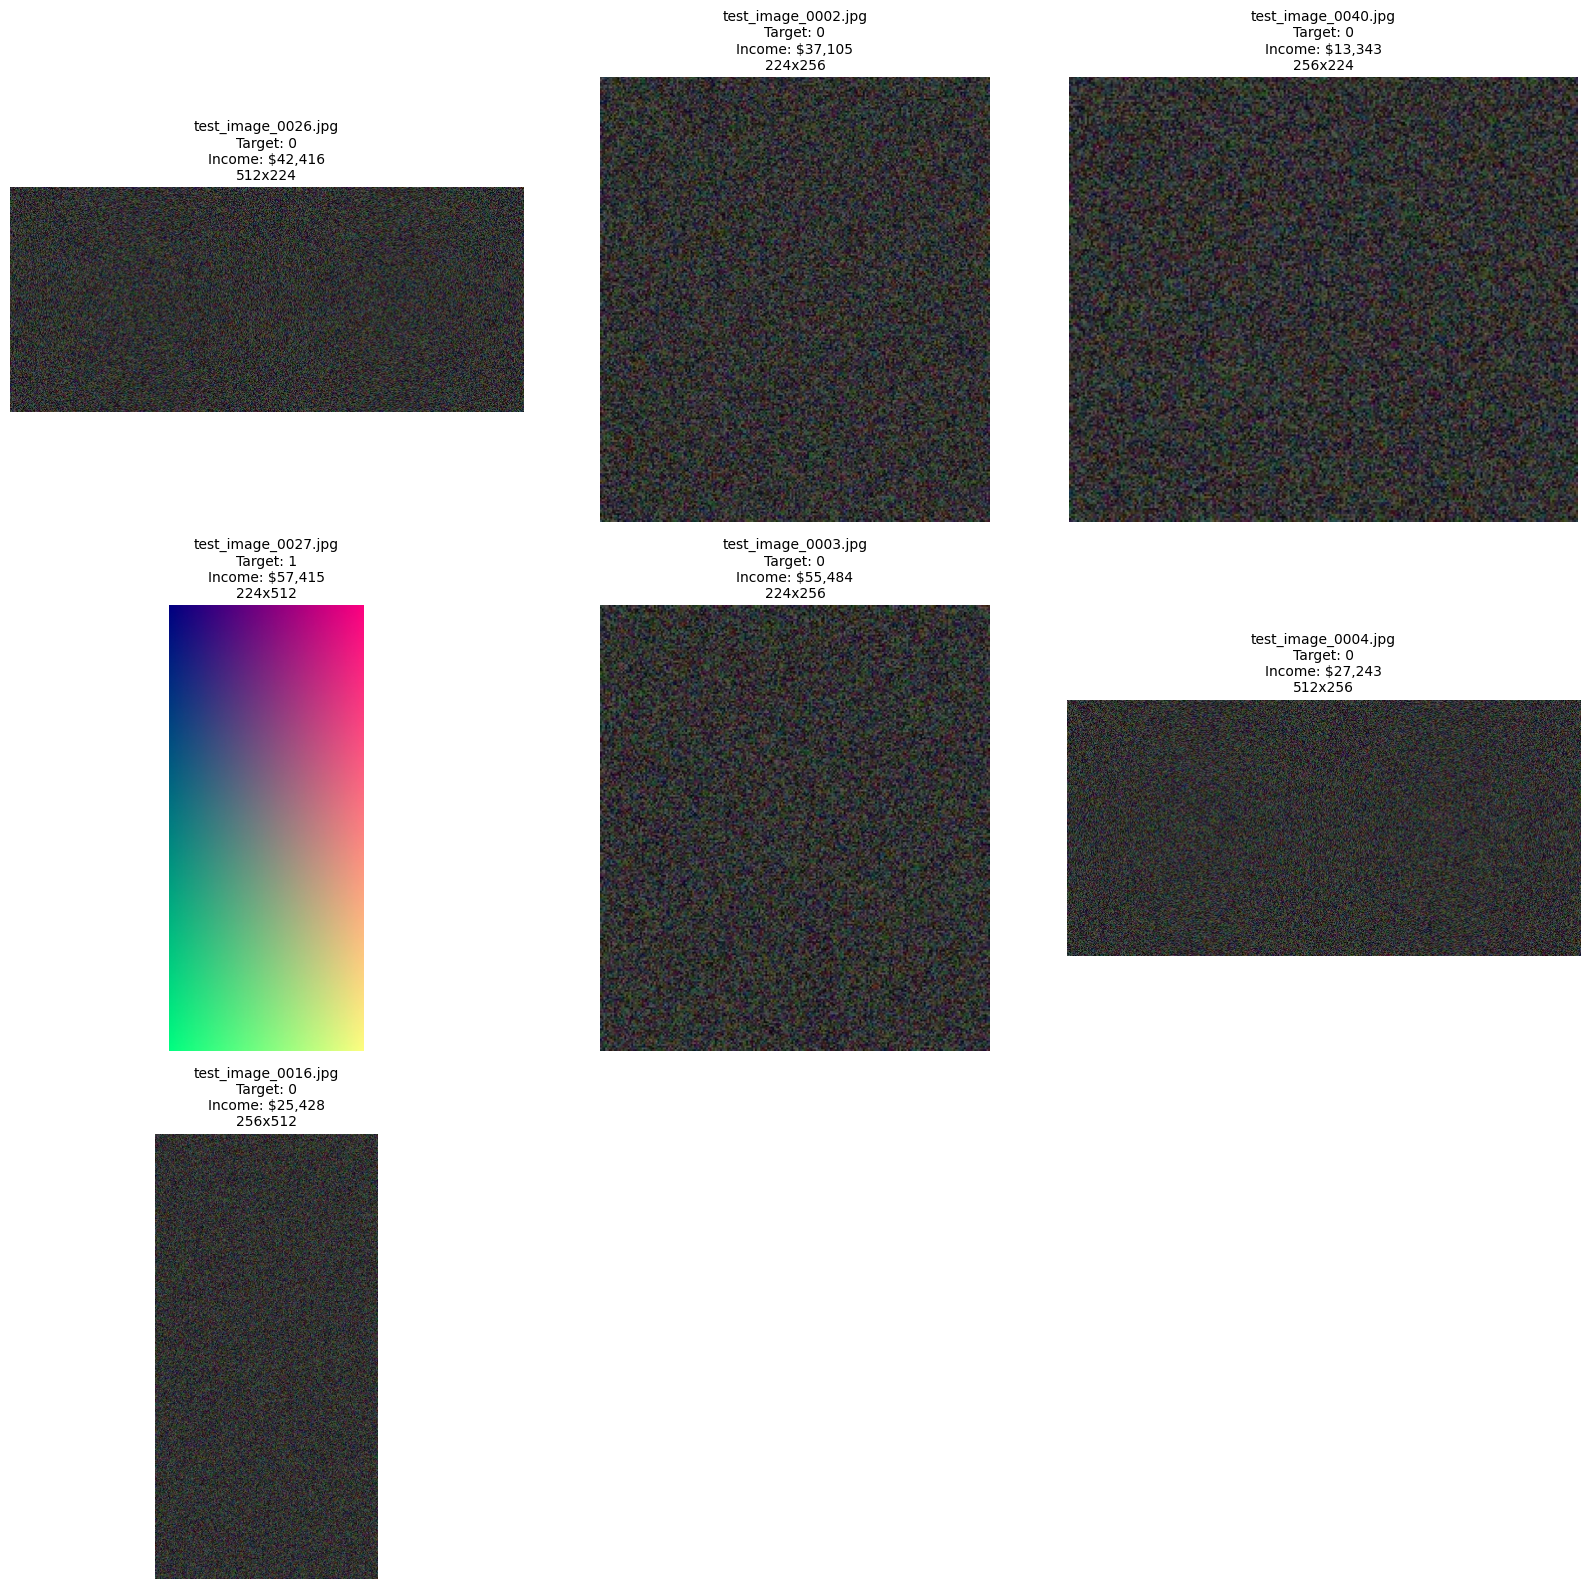

In [17]:
# Show images for a specific segment
gold_members = df_with_images[df_with_images['membership_level'] == 'Gold']

if len(gold_members) > 0:
    sample = gold_members.sample(min(9, len(gold_members)))
    paths = sample['path'].tolist()
    labels = [f"Target: {row['target']}\nIncome: ${row['annual_income']:,.0f}" 
              for _, row in sample.iterrows()]
    
    photo_tools.plot_image_grid(paths, labels=labels, n_cols=3)

# Save Combined Dataset

In [18]:
# Save the combined dataset for future use
df_with_images.to_csv('../data/processed/test_data_with_images.csv', index=False)
print(f"Saved combined dataset with {len(df_with_images)} rows")

Saved combined dataset with 50 rows
